# Exploratory Analysis with Human Trafficking Victims Data

The data contains the information of the identified and reported victims of human trafficking. There are 63 variables that describe the socio-demographic profile of victims, the trafficking process, and the type of exploitation. The data is obtained from Kaggle, and the username of the author is "mexwell".

I try to clean and analyze the data to identify the origins and destinations of human trafficking recorded in this dataset, obtain summary statistics of the victims' profile and ways of exploitation, and take note of the different trafficking process and the type of exploitation for different socio-demographic groups.

I will be using some Python packages to handle and visualize data, including Numpy, Pandas, Matplotlib, Plotly, and Seaborn. To save the data and keep track of the results, I will use the os package.

This notebook is the course project for [Data Analysis with Python: Zero to Pandas](zerotopandas.com).

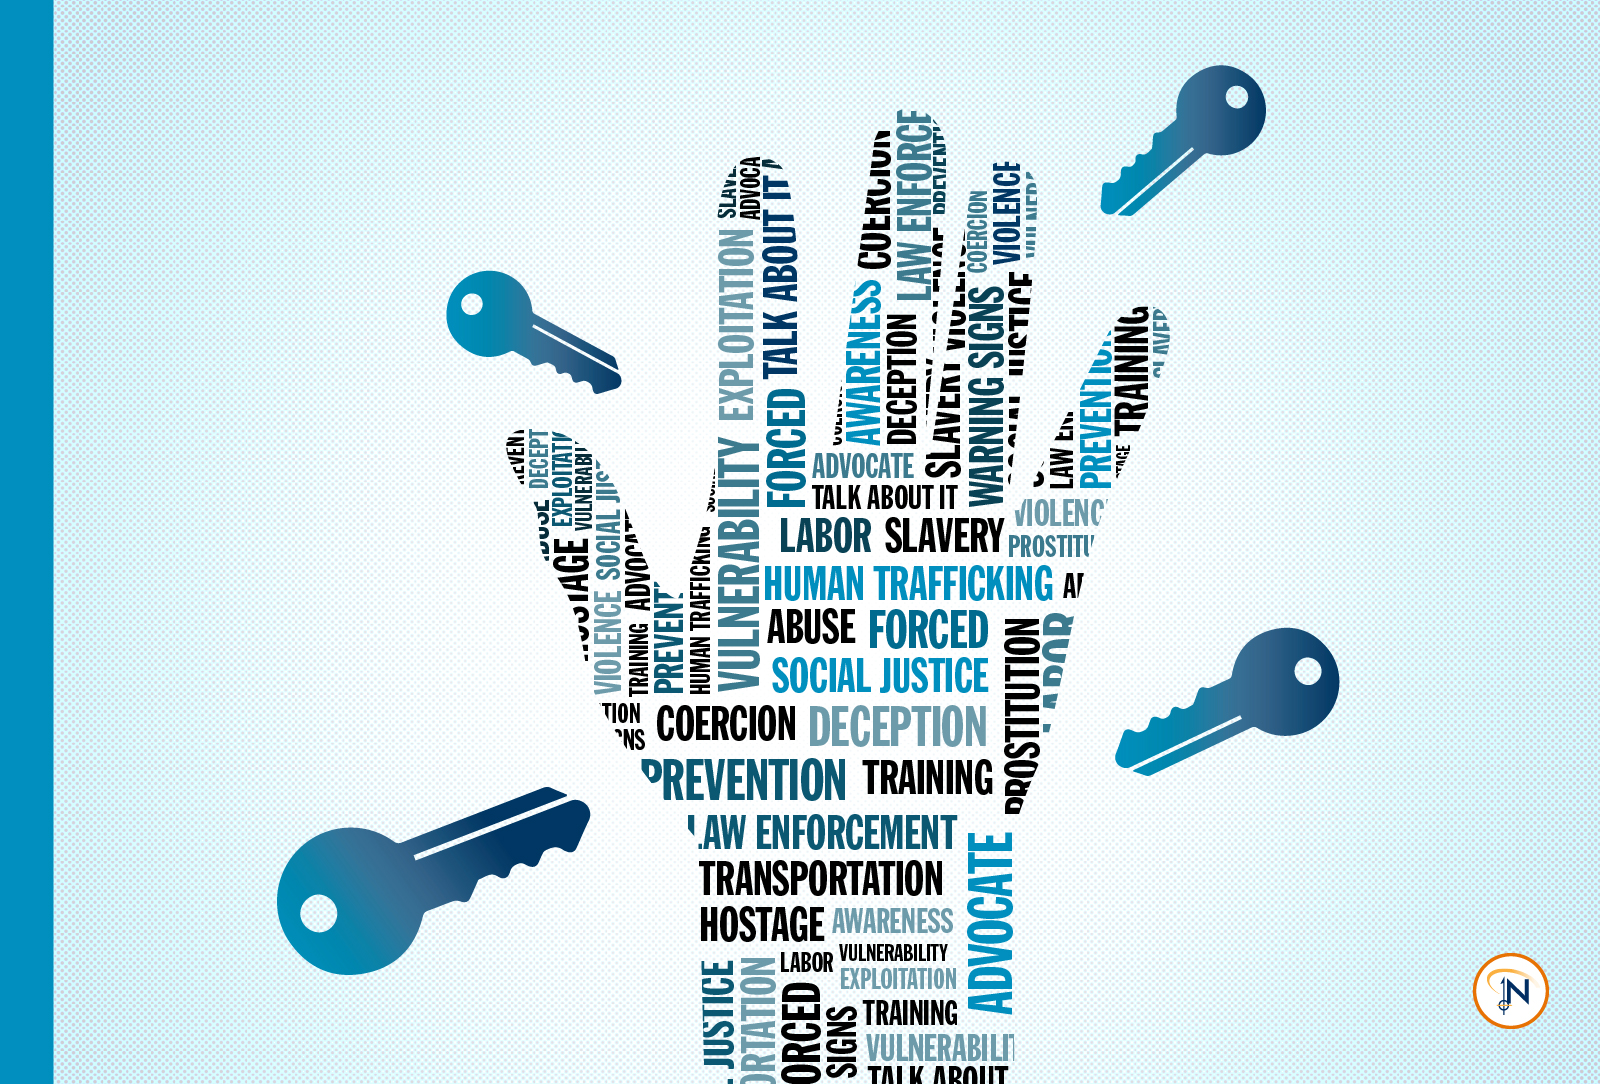

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

In this section, I download the data from Kaggle in a csv format, and create the project.

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/mexwell/human-trafficking-victims-dataset-ctdc'

In [ ]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dw1009
Your Kaggle Key: ········


100%|██████████| 671k/671k [00:01<00:00, 490kB/s]

The dataset has been downloaded and extracted.

In [ ]:
# Change this
data_dir = './human-trafficking-victims-dataset-ctdc'

In [ ]:
import os
os.listdir(data_dir)

['CTDCk_codebook_v7_1.pdf', 'the_global_k_anon_dataset.csv']

Let us save and upload our work to Jovian before continuing.

In [ ]:
project_name = "zerotopandas-course-project-human-trafficking-data" # change this (use lowercase letters and hyphens only)

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "di332333/zerotopandas-course-project-human-trafficking-data" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/di332333/zerotopandas-course-project-human-trafficking-data


'https://jovian.com/di332333/zerotopandas-course-project-human-trafficking-data'

## Data Preparation and Cleaning

In this section, I do the following.
1. load the csv file into a Pandas dataframe.
2. check missing or invalid data



In [ ]:
# The original data has all column names and all data in a single row, separated by semicolons. It also had I have used text-to-column in Microsoft excel,
# because the data['column'].str.split() method does not produce ideal results, yielding empty and None values, instead of
# NaN values.
# To separate the column names, use data.columns.str.split(';') and get a list of new column names, and assign it to the
# new dataframe of splitted columns.

# Update: set delimiter in pd.read_csv is helpful and saves the effort of splitting strings in column names and contents.
import pandas as pd
data = pd.read_csv(data_dir + "/the_global_k_anon_dataset.csv",sep=';')
data = data.drop(columns = data.columns[0])
data

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6,55,57) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


yearOfRegistration       Datasource  gender ageBroad majorityStatus  \
0                  2002.0  Case Management  Female   18--20          Adult   
1                  2002.0  Case Management  Female   18--20          Adult   
2                  2002.0  Case Management  Female   18--20          Adult   
3                  2002.0  Case Management  Female   18--20          Adult   
4                  2002.0  Case Management  Female   18--20          Adult   
...                   ...              ...     ...      ...            ...   
97745                 NaN  Case Management    Male    9--17          Minor   
97746                 NaN  Case Management    Male    9--17          Minor   
97747                 NaN  Case Management    Male    9--17          Minor   
97748                 NaN  Case Management    Male    9--17          Minor   
97749                 NaN  Case Management    Male    9--17          Minor   

      majorityStatusAtExploit majorityEntry citizenship  \
0                         NaN           NaN          CO   
1                         NaN           NaN          CO   
2                         NaN           NaN          CO   
3                         NaN           NaN          CO   
4                         NaN           NaN          CO   
...                       ...           ...         ...   
97745                     NaN           NaN          CM   
97746                     NaN           NaN          CM   
97747                     NaN           NaN          CM   
97748                     NaN           NaN          CM   
97749                     NaN           NaN          CM   

       meansOfControlDebtBondage  meansOfControlTakesEarnings  ...  \
0                            NaN                          NaN  ...   
1                            NaN                          NaN  ...   
2                            NaN                          NaN  ...   
3                            NaN                          NaN  ...   
4                            NaN                          NaN  ...   
...                          ...                          ...  ...   
97745                        NaN                          NaN  ...   
97746                        NaN                          NaN  ...   
97747                        NaN                          NaN  ...   
97748                        NaN                          NaN  ...   
97749                        NaN                          NaN  ...   

       typeOfSexPrivateSexualServices  typeOfSexConcatenated  isAbduction  \
0                                 NaN                    NaN          0.0   
1                                 NaN                    NaN          0.0   
2                                 NaN                    NaN          0.0   
3                                 NaN                    NaN          0.0   
4                                 NaN                    NaN          0.0   
...                               ...                    ...          ...   
97745                             NaN                    NaN          NaN   
97746                             NaN                    NaN          NaN   
97747                             NaN                    NaN          NaN   
97748                             NaN                    NaN          NaN   
97749                             NaN                    NaN          NaN   

       RecruiterRelationship  CountryOfExploitation  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   
...                      ...                    ...   
97745                    NaN                     LY   
97746                    NaN                     LY   
97747                    NaN                     LY   
97748                    NaN                 

In [ ]:
# To explore the range of values. code is inspired by https://stackoverflow.com/questions/53923282/find-the-range-of-all-columns-difference-between-maximum-and-minimum-while-gra
# handle numberic columns and string columns separately

import numpy as np
num_cols = data.select_dtypes(include=[np.number])
num_range = num_cols.max() - num_cols.min()

str_cols = data.select_dtypes(include=[object])
str_range = str_cols.max() + ' - ' + str_cols.min()

num_range.append(str_range)

/tmp/ipykernel_64/2512547890.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  str_range = str_cols.max() + ' - ' + str_cols.min()


yearOfRegistration                                             19.0
meansOfControlDebtBondage                                       1.0
meansOfControlTakesEarnings                                     1.0
meansOfControlRestrictsFinancialAccess                          1.0
meansOfControlThreats                                           1.0
meansOfControlPsychologicalAbuse                                1.0
meansOfControlPhysicalAbuse                                     1.0
meansOfControlSexualAbuse                                       1.0
meansOfControlFalsePromises                                     1.0
meansOfControlPsychoactiveSubstances                            1.0
meansOfControlRestrictsMovement                                 1.0
meansOfControlRestrictsMedicalCare                              1.0
meansOfControlExcessiveWorkingHours                             1.0
meansOfControlUsesChildren                                      1.0
meansOfControlThreatOfLawEnforcement            

In [ ]:
# display the unique values of the variables
data['isOrganRemoval'].unique()
data['Datasource'].unique()

array(['Case Management', 'Hotline'], dtype=object)

In [ ]:
# to display more rows, use pd.set_option()
# display the number of missing values in each column
pd.set_option('display.max_rows', 70)
data.isnull().sum(axis = 0)

yearOfRegistration                         2011
Datasource                                    0
gender                                     8138
ageBroad                                  46783
majorityStatus                            26504
majorityStatusAtExploit                   76464
majorityEntry                             90498
citizenship                               44460
meansOfControlDebtBondage                 89515
meansOfControlTakesEarnings               86312
meansOfControlRestrictsFinancialAccess    93419
meansOfControlThreats                     82223
meansOfControlPsychologicalAbuse          83014
meansOfControlPhysicalAbuse               85817
meansOfControlSexualAbuse                 88737
meansOfControlFalsePromises               89626
meansOfControlPsychoactiveSubstances      86778
meansOfControlRestrictsMovement           83637
meansOfControlRestrictsMedicalCare        91779
meansOfControlExcessiveWorkingHours       89121
meansOfControlUsesChildren              

In [ ]:
# display the proportion of missing data
data.isnull().sum(axis = 0)/data.shape[0]

yearOfRegistration                        0.020573
Datasource                                0.000000
gender                                    0.083253
ageBroad                                  0.478598
majorityStatus                            0.271141
majorityStatusAtExploit                   0.782240
majorityEntry                             0.925811
citizenship                               0.454834
meansOfControlDebtBondage                 0.915754
meansOfControlTakesEarnings               0.882987
meansOfControlRestrictsFinancialAccess    0.955693
meansOfControlThreats                     0.841156
meansOfControlPsychologicalAbuse          0.849248
meansOfControlPhysicalAbuse               0.877923
meansOfControlSexualAbuse                 0.907795
meansOfControlFalsePromises               0.916890
meansOfControlPsychoactiveSubstances      0.887754
meansOfControlRestrictsMovement           0.855621
meansOfControlRestrictsMedicalCare        0.938916
meansOfControlExcessiveWorkingH

Here is an initial glance of the data.
1. There are 97750 rows and 63 columns, which is consistent with the description of the codebook.
2. The victims were registered across 20 years. Most numeric variables have range 1, which means there are both zero and one values. The codebook describes them as binary, so there are no values outside of the range that it should be. Some numeric variables has no variation in values, because 0 is the only unique value (use the function df['col'].unique().
3. The only string variable is "Datasource", which shows the victims information comes from either case management or hotline.
4. In terms of missing data, the only column with no missing data is "Datasource". Most binary variables has a considerable amount of missing data, ranging from about 14% to around 90%. Therefore, we should analyze the data and make inferences with some caution.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "di332333/zerotopandas-course-project-human-trafficking-data" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/di332333/zerotopandas-course-project-human-trafficking-data


'https://jovian.com/di332333/zerotopandas-course-project-human-trafficking-data'

## Exploratory Analysis and Visualization

In this section, I visualize the following patterns.
1. Time trend of the number of the registered victims using histogram.
2. Human trafficking flow between countries.
3. The age of victims by gender.
4. The number of victims who were abducted, by gender and age.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### For starters, let's check the evolution of the number of registered victims over the years using a histogram. To show the time trend more clearly, let's connect the center of each bin.

In [ ]:
# convert yearOfRegistration from float to string, so ticks show 2002 instead of 2002.0 etc.
# need to deal with NaN values: replace them with an "incorrect" value, and change back
data['yearOfRegistration'] = data['yearOfRegistration'].fillna(-1)
data['year_str'] = data['yearOfRegistration'].astype(int)
data['year_str'] = data['year_str'].astype(str)
data['yearOfRegistration']  = data['yearOfRegistration'].replace(-1, np.nan)
data['year_str'] = data['year_str'].replace('-1', "")

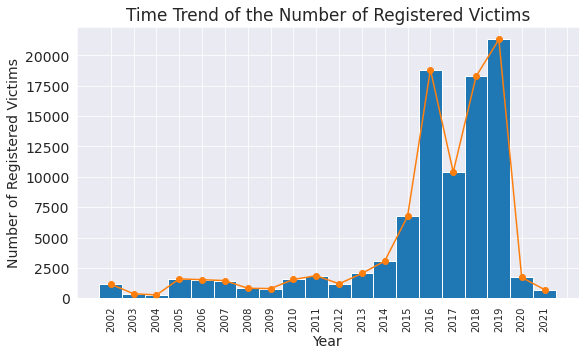

In [ ]:
n, x,_ = plt.hist(data['year_str'], bins = np.arange(21)-0.5)
# add label and title
plt.xlabel('Year')
plt.xticks(fontsize = 10, rotation = 'vertical')
plt.ylabel('Number of Registered Victims')
plt.title('Time Trend of the Number of Registered Victims')
# compute bin centers using the bins
bin_centers = 0.5*(x[1:]+x[:-1])
# plot using bin centers and the data from histogram, in a format that connects the dots
# use semicolon to suppress the explanation and show the graph only
plt.plot(bin_centers, n,'-o');

Here are some insights from the plot.
1. In general, the number of victim registrations increase from 2002 to 2018, and experienced a substantial drop from 2019 to 2021. We should be cautious about interpreting this as trend of the number of victims of human trafficking, because CTDC may not be able to always collect a representative sample of the victims. For example, it is likely that the victims were more aware of CTDC in later years.
2. Specifically, the number of victims was under 2500 until 2014, more than doubled from years 2015 (less than 7500) and 2016 (more than 17500). The peak was at 2019 (more than 20000), and dropped to less than 2500 after 2020.

#### Then let's check the countries of the largest number of inflow and outflow of human trafficking victims. I do this by plotting a sankey diagram. A heatmap could also effectively display this piece of information.


In [ ]:
!pip install jovian plotly --upgrade --quiet
import plotly.graph_objects as go

# first, let's create a dataframe of inflow-outflow pair to decide which countries to include in the diagram.
# let's display the pair if the flow exceeds 500 people.
pd.set_option('display.max_rows', 200)
dat_flow = data.groupby(['citizenship','CountryOfExploitation'], as_index = False).size()
dat_flow_disp = dat_flow[dat_flow['size']>=500]
dat_flow_disp

citizenship CountryOfExploitation  size
21           BY                    RU   800
27           CM                    LY   626
36           GH                    GH   558
49           ID                    MY   531
68           KH                    KH   912
84           MM                    ID  1229
89           MX                    US  2351
96           NG                    ML   581
108          PH                    PH  1988
139          UA                    PL   709
141          UA                    RU  4499
147          US                    US  6366

In [ ]:
outflow_list = dat_flow_disp['citizenship'].unique().tolist()
outflow_list

['BY', 'CM', 'GH', 'ID', 'KH', 'MM', 'MX', 'NG', 'PH', 'UA', 'US']

In [ ]:
inflow_list = dat_flow_disp['CountryOfExploitation'].unique().tolist()
inflow_list
# overlapped countries: GH, ID, KH, PH, US

['RU', 'LY', 'GH', 'MY', 'KH', 'ID', 'US', 'ML', 'PH', 'PL']

In [ ]:
size_list = dat_flow_disp['size'].tolist()
size_list

[800, 626, 558, 531, 912, 1229, 2351, 581, 1988, 709, 4499, 6366]

In [ ]:
NODES = dict( #11 for outflow, 10 for inflow
label = outflow_list + inflow_list,
color = ['darksalmon', 'darkgray', 'aqua', 'aquamarine', 'magenta',
                'darkblue', 'olive', 'black', 'blanchedalmond', 'blue',
                'blueviolet',  'brown', 'burlywood', 'aqua',
                'chartreuse', 'magenta', 'aquamarine', 'blueviolet',
                'cornsilk', 'blanchedalmond', 'cyan'])
LINKS = dict(source = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 10], # The origin or the source nodes of the link
target = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 11, 17], # The destination or the target nodes of the link
value =  size_list, # The width (quantity) of the links
# Color of the links
color =     ['darksalmon', 'darkgray', 'aqua', 'aquamarine', 'magenta',
                'darkblue', 'olive', 'black', 'blanchedalmond', 'blue', 'blue',
                'blueviolet'])
sankey_data = go.Sankey(node = NODES, link = LINKS)
fig = go.Figure(sankey_data)
fig.update_layout(title="Inflow and Outflow of Human Trafficking Victims",  font_size=16)
fig.show()

Here are some insights from the plot.
1. The largest flow is within the United States (around 6.37k), followed by Ukraine to Russia (4.50k).
2. There is also considerable outflow from Mexico to the United States (2.35k), and within Philippines(1.99k).

#### Then, let's check the age of the victims at the time of their registration, grouped by gender. I do this by a plotting a histogram in seaborn.


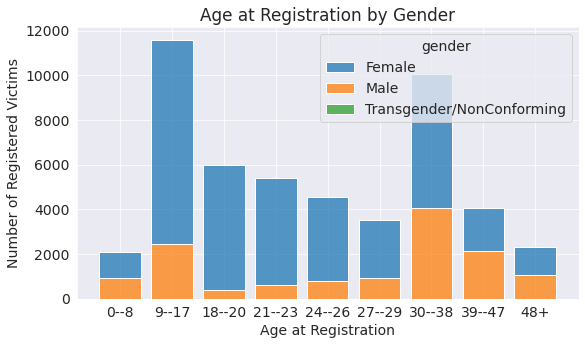

In [ ]:
# categorize the age variable, so the histogram shows the frequencies in a sorted order.

data['age_str'] = pd.Categorical(data['ageBroad'], ['0--8', '9--17', '18--20', '21--23', '24--26', '27--29', '30--38','39--47', '48+'])
sns.histplot(data = data,
            x = 'age_str',
            hue = 'gender',
            stat = 'count',
            multiple = 'stack',
            shrink = 0.8,
            discrete = True,
            legend = True,
            )
plt.xlabel('Age at Registration')
plt.ylabel('Number of Registered Victims')
plt.title('Age at Registration by Gender');

Here are some insights from the plot.
1. The victims who reported their age are either male or female.
2. There are considerably more female victims in age 9-48. The numbers are similar for both genders in younger or older groups.
3. The age distribution of female victims are more concentrated at younger age groups compared with male victims. The age group with the largest number of female victims is 9-17, followed by 18-20 and 30-38. Note 18-20 is a small range. The age group with the largest number of male victims is 30-38, followed by 39-47 and 9-17.

#### Last but not least, let's look at the number of people who went through abduction (exploitation through wrongful removal and retention) by age and gender using a heatmap.

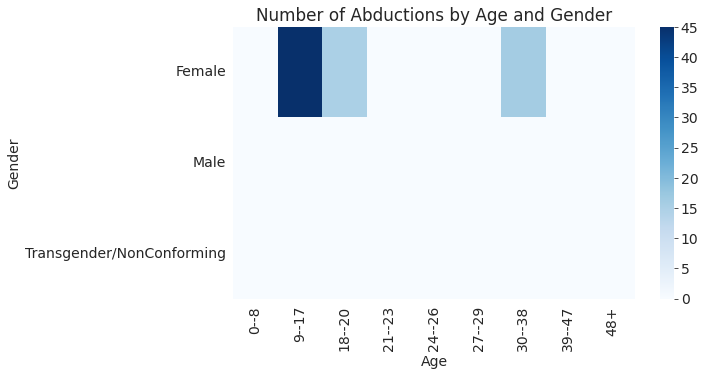

In [ ]:
data_abd = data.groupby(["age_str", "gender"], as_index=False)[['isAbduction']].sum()
data_piv = data_abd.pivot("gender", "age_str", "isAbduction")
heatmap = sns.heatmap(data_piv, cmap = 'Blues')
heatmap.set_xlabel('Age')
heatmap.set_ylabel('Gender')
plt.title('Number of Abductions by Age and Gender');

Here are some insights from the plot.
1. Only a small number of female victims (mostly aged 9-17) were abducted.
2. This suggests the victims were trafficked through means other than abduction.

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "di332333/zerotopandas-course-project-human-trafficking-data" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/di332333/zerotopandas-course-project-human-trafficking-data


'https://jovian.com/di332333/zerotopandas-course-project-human-trafficking-data'

## Asking and Answering Questions

In this section, I further explore the number of victims by group, the relation between the victim and the recruiter, crime committed toward victims, and the means of control. I mainly use groupby method.



#### Q1: What are the number of female victims in each age group?

In [ ]:
num_female = data[data['gender']=='Female'].groupby(['ageBroad']).size()
num_female

ageBroad
0--8      1125
18--20    5584
21--23    4760
24--26    3746
27--29    2573
30--38    6000
39--47    1914
48+       1237
9--17     9137
dtype: int64

Answer: The number of female victims ranges from 1125 to 9137, as shown above.

#### Q2: What is the most common type of the victim's relation with the recruiter by gender?

In [ ]:
num_relation = data.groupby(['gender'])[['recruiterRelationIntimatePartner','recruiterRelationFriend','recruiterRelationFamily','recruiterRelationOther','recruiterRelationUnknown']].sum()

In [ ]:
num_relation

recruiterRelationIntimatePartner  \
gender                                                        
Female                                               3556.0   
Male                                                   25.0   
Transgender/NonConforming                               0.0   

                           recruiterRelationFriend  recruiterRelationFamily  \
gender                                                                        
Female                                      2058.0                   2765.0   
Male                                         983.0                    432.0   
Transgender/NonConforming                      1.0                      0.0   

                           recruiterRelationOther  recruiterRelationUnknown  
gender                                                                       
Female                                     4721.0                   55052.0  
Male                                       3273.0                   16793.0  
Transgender/NonConforming                     0.0                      63.0

Answer: Except unknown and other relations, the most common type of relation for female victims is intimate partner, followed by family and friend. Male victims, on the other hand, are most likely to be friend and family.

#### Q3: What is the most common crime that a victim suffered  by age and gender?

In [ ]:
num_motive = data.groupby(['gender','age_str'])[['isForcedLabour','isSexualExploit','isOtherExploit','isSexAndLabour','isForcedMarriage','isForcedMilitary','isOrganRemoval','isSlaveryAndPractices']].sum()
num_motive

isForcedLabour  isSexualExploit  \
gender                    age_str                                    
Female                    0--8               99.0            231.0   
                          9--17             595.0           6506.0   
                          18--20            182.0           3799.0   
                          21--23            128.0           2964.0   
                          24--26            203.0           2067.0   
                          27--29            243.0           1293.0   
                          30--38           1079.0           2484.0   
                          39--47            359.0            718.0   
                          48+               193.0            333.0   
Male                      0--8              137.0             89.0   
                          9--17             632.0            496.0   
                          18--20            166.0             30.0   
                          21--23            348.0             25.0   
                          24--26            431.0             17.0   
                          27--29            494.0              0.0   
                          30--38           1882.0             24.0   
                          39--47            867.0              0.0   
                          48+               350.0              0.0   
Transgender/NonConforming 0--8                0.0              0.0   
                          9--17               0.0              0.0   
                          18--20              0.0              0.0   
                          21--23              0.0              0.0   
                          24--26              0.0              0.0   
                          27--29              0.0              0.0   
                          30--38              0.0              0.0   
                          39--47              0.0              0.0   
                          48+                 0.0              0.0   

                                   isOtherExploit  isSexAndLabour  \
gender                    age_str                                   
Female                    0--8               32.0             0.0   
                          9--17              39.0            32.0   
                          18--20             23.0            54.0   
                          21--23             16.0             0.0   
                          24--26              0.0             0.0   
                          27--29              0.0            15.0   
                          30--38             29.0            78.0   
                          39--47             13.0            27.0   
                          48+                 0.0             0.0   
Male                      0--8                0.0             0.0   
                          9--17              18.0             0.0   
                          18--20              0.0             0.0   
                          21--23              0.0             0.0   
                          24--26              0.0             0.0   
                          27--29              0.0             0.0   
                          30--38             11.0             0.0   
                          39--47             17.0             0.0   
                          48+                 0.0             0.0   
Transgender/NonConforming 0--8                0.0             0.0   
                          9--17               0.0             0.0   
                          18--20              0.0             0.0   
                          21--23              0.0             0.0   
                          24--26              0.0             0.0   
                          27--29              0.0             0.0   
                          30--38              0.0             0.0   
                          39--47              0.0             0.0   
                          48+                 0.0             0.0   

  

Answer: All age groups of female victims were mostly likely to to experience sex exploitation. All age groups of male victims were most likely to be forced to work.

#### Q4: What is the largest number of means of control that happen to one person?

In [ ]:
num_means = data.iloc[:, 8:26].sum(axis=1)
num_means.max()

15.0

Answer: a victim could suffer as many as 15 means of control.

Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "di332333/zerotopandas-course-project-human-trafficking-data" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/di332333/zerotopandas-course-project-human-trafficking-data


'https://jovian.com/di332333/zerotopandas-course-project-human-trafficking-data'

## Inferences and Conclusion

* There is large variation in victims in terms of age and gender.
* The number of victim registrations also fluctuates over time.
* The United States, Ukraine, Mexico, and Philippines are countries of large outflow. Russia, the United States, and Philippines are countries of large inflow.
* Very few victims were abducted.
* Female victims were more likely to be recruited by an intimate partner, and suffer from sex exploitation, regardless of their age. Male victims were more likely to be recruited by friend, and suffer from forced labor.
* A victim could be controlled by many means.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "di332333/zerotopandas-course-project-human-trafficking-data" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/di332333/zerotopandas-course-project-human-trafficking-data


'https://jovian.com/di332333/zerotopandas-course-project-human-trafficking-data'

## References and Future Work

### Future work
* Check if there are patterns for missing data by data source, country of inflow/outflow, and means of control.
* Explore the means of control across age, gender groups, and country of inflow/outflow.
* Highlight the experience of the minor victims, including the means of control and type of exploitation.
* If possible, collect more information about the type of trafficking in addition to abduction.

### References
1. https://www.equivant.com/four-ways-to-fight-human-trafficking-in-your-community/
2. https://stackoverflow.com/questions/53923282/find-the-range-of-all-columns-difference-between-maximum-and-minimum-while-gra
3. https://www.analyticsvidhya.com/blog/2021/11/visualize-data-using-sankey-diagram/

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "di332333/zerotopandas-course-project-human-trafficking-data" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/di332333/zerotopandas-course-project-human-trafficking-data


'https://jovian.com/di332333/zerotopandas-course-project-human-trafficking-data'